![title](./images/vader_1.jpg)

# En este ejercicio, enseñaremos sentimientos al ordenador
<br>

 <div class="alert alert-block alert-info">
El <strong>sentiment analysis</strong> se usa sobre todo en el ámbito de las redes sociales, y el marketing digital.
</div>

<br>

## Contenidos ##
- ### Librería vader de analisis de sentimientos.
- ### Ejemplo de frases positivas, negativas y neutras.
- ### Ejemplo de traducción a otros idiomas
- ### Analisis del hashtag de twitter
- ### Resultado y conclusión

Vamos a medir la intensidad del sentimiento usando la librería vader. https://github.com/cjhutto/vaderSentiment

Nos va a devolver un diccionario con la polarización de sentimientos (el polarity score).
 - neg: Negative
 - neu: Neutral
 - pos: Positive
 - compound: Compound (i.e. aggregated score)

In [1]:
# Definimos una gráfica
import matplotlib.pyplot as plt

def mostrar_grafica(puntuacion):
    plt.bar(range(len(puntuacion)), list(puntuacion.values()), align='center')
    plt.xticks(range(len(puntuacion)), list(puntuacion.keys()))
    plt.show()


Probamos con una frase neutral

Let's get work. 
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


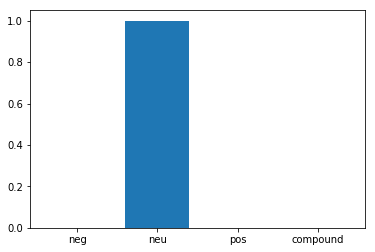

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
FRASE="Let's get work."

puntuacion = SentimentIntensityAnalyzer().polarity_scores(FRASE)

print( FRASE , "\n",puntuacion)

mostrar_grafica(puntuacion)


Una frase positiva

This tea is excellent 
 {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}


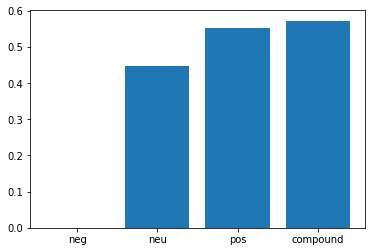

In [3]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

FRASE="This tea is excellent"

puntuacion = SentimentIntensityAnalyzer().polarity_scores(FRASE)

print( FRASE , "\n", puntuacion)

mostrar_grafica(puntuacion)



Y una frase negativa

The traffic is a living hell. 
 {'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.6808}


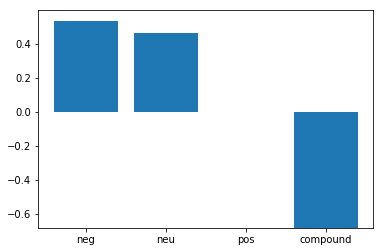

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

FRASE="The traffic is a living hell."

puntuacion = SentimentIntensityAnalyzer().polarity_scores(FRASE)

print( FRASE , "\n", puntuacion)
mostrar_grafica(puntuacion)


### Ejemplo de traducción a otros idiomas

Hay que traducir la frase, antes de pasársela a vader.

Se ha estropeado la maldita máquina, joder joder joder.  se traduce por :  The damn machine is screwed up, fuck fuck fuck.
The damn machine is screwed up, fuck fuck fuck. {'neg': 0.804, 'neu': 0.196, 'pos': 0.0, 'compound': -0.9468}


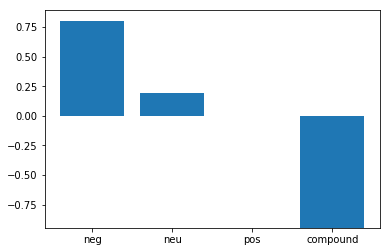

In [5]:
import requests
import json
import string

frase = "Se ha estropeado la maldita máquina, joder joder joder."

from_lang = 'es'
to_lang = 'en'
api_url = "http://mymemory.translated.net/api/get?q={}&langpair={}|{}".format(frase, from_lang, to_lang)

hdrs = { 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
        'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
        'Accept-Encoding': 'none',
        'Accept-Language': 'en-US,en;q=0.8',
        'Connection': 'keep-alive'}

response = requests.get(api_url, headers=hdrs)
response_json = json.loads(response.text)
translation = response_json["responseData"]["translatedText"]
print(frase, " se traduce por : ",translation)

sentence = translation

analyzer = SentimentIntensityAnalyzer()
puntuacion = analyzer.polarity_scores(sentence)

print(sentence, puntuacion)

mostrar_grafica(puntuacion)



### Sentiment analisys del hashtag de twitter

Vamos a descargarnos los tweets de un hashtag determinado, y le vamos a pasar por vader.


La idea es detectar los tweets negativos sobre algo.


El hashtag es #Factoftheday

In [15]:

import tweepy
import csv
import pandas as pd
from datetime import date, timedelta

####
# Quitamos la primera letra de las variables, y ponemos un guión para despistar a los parser
onsumer_key    = 'h_mFJIxaV0HqCuKVZc8iZL65sJ'
onsumer_secret = 'l_eDBguzuUDqd4v2YwKf9cYywWBWEDX4XV341HVdLHC18n1C7kP'
ccess_token    = '7_92058678581026816-ZZk5lNrzMcLJdHRrRLMn6LIksQLDZTi'
ccess_token_secret   = 'z_skKIFghdWezAgpChHLGrVX6OtZPBOmSOvG1tPMtWlK6b'

print(" Nos conectamos a twitter" )


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

hashtag = "#FactOfTheDay"
options = " -filter:retweets"
array = []

# Pedimos datos al api
for tweet in tweepy.Cursor(api.search , count=100,q=hashtag + options, lang="en", tweet_mode="extended").items() :
    array.append({"hashtag" : hashtag  , 
                  "tweet" : tweet.full_text,
                  "link" : "https://twitter.com/"+ tweet._json["user"]["screen_name"] + "/status/" + tweet.id_str ,
                 })

# Guardar a disco    
df = pd.DataFrame(array)
df.to_csv('datasets/tweeter.csv',index=False)

print(" Acabamos de descargarnos los tweets" )
df.head(5)

 Nos conectamos a twitter
 Acabamos de descargarnos los tweets


,hashtag,link,tweet
0,#FactOfTheDay,https://twitter.com/BillericayNews/status/1040...,#DidYouKnow some of the earliest records of hu...
1,#FactOfTheDay,https://twitter.com/CLDT_Chennai/status/104090...,Spinach also helps in protection against eye d...
2,#FactOfTheDay,https://twitter.com/GillinghamTalk/status/1040...,#DidYouKnow Gillingham was served by an electr...
3,#FactOfTheDay,https://twitter.com/GreatDunmowTalk/status/104...,#DidYouKnow Great Dunmow is well Known for its...
4,#FactOfTheDay,https://twitter.com/DPOMUK/status/104089826885...,"Did you know, people now spend more time onlin..."


In [7]:
#########################################
### Cargamos el DataFrame, desde un csv.
### Por si no los hemos descargado
#########################################
import pandas as pd
tweets = pd.read_csv('datasets/tweeter.csv',encoding = 'utf8')
tweets.head()

,hashtag,link,tweet
0,#FactOfTheDay,https://twitter.com/BillericayNews/status/1040...,#DidYouKnow some of the earliest records of hu...
1,#FactOfTheDay,https://twitter.com/CLDT_Chennai/status/104090...,Spinach also helps in protection against eye d...
2,#FactOfTheDay,https://twitter.com/GillinghamTalk/status/1040...,#DidYouKnow Gillingham was served by an electr...
3,#FactOfTheDay,https://twitter.com/GreatDunmowTalk/status/104...,#DidYouKnow Great Dunmow is well Known for its...
4,#FactOfTheDay,https://twitter.com/DPOMUK/status/104089826885...,"Did you know, people now spend more time onlin..."


Ahora que tenemos los tweets en un dataframe, 

por cada tweet, vamos llamando a vader, para sacar las puntuaciones.

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

array_puntuaciones = []
for index, row in tweets.iterrows():
    puntuacion = SentimentIntensityAnalyzer().polarity_scores(row.tweet.replace("#",""))
    array_puntuaciones.append ( puntuacion)


df = pd.DataFrame(array_puntuaciones)
df["hashtag"] = tweets["hashtag"]
df["tweet"]   = tweets["tweet"]
df["link"]    = tweets["link"]

df.head()

,compound,neg,neu,pos,hashtag,tweet,link
0,0.0000,0.0,1.000,0.000,#FactOfTheDay,#DidYouKnow some of the earliest records of hu...,https://twitter.com/BillericayNews/status/1040...
1,0.7003,0.0,0.791,0.209,#FactOfTheDay,Spinach also helps in protection against eye d...,https://twitter.com/CLDT_Chennai/status/104090...
2,0.0000,0.0,1.000,0.000,#FactOfTheDay,#DidYouKnow Gillingham was served by an electr...,https://twitter.com/GillinghamTalk/status/1040...
3,0.7351,0.0,0.708,0.292,#FactOfTheDay,#DidYouKnow Great Dunmow is well Known for its...,https://twitter.com/GreatDunmowTalk/status/104...
4,0.0000,0.0,1.000,0.000,#FactOfTheDay,"Did you know, people now spend more time onlin...",https://twitter.com/DPOMUK/status/104089826885...


In [9]:
# Esta clase es solp para mostrar el tweet por pantalla

import requests
class Tweet(object):
    def __init__(self, s, embed_str=False):
        if not embed_str:
            # Use Twitter's oEmbed API
            # https://dev.twitter.com/web/embedded-tweets
            api = 'https://publish.twitter.com/oembed?url={}'.format(s)
            response = requests.get(api)
            self.text = response.json()["html"]
        else:
            self.text = s

    def _repr_html_(self):
        return self.text

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 

s = f"""<h3>Los tweets mas positivos son : </h3>"""
display(HTML(s))

# Cogemos los valores mas positivos
minitabla = df.sort_values(by=['pos'],ascending = False ).head(3)[["compound" ,"neg" ,"neu" ,"pos" ,"tweet", "link"]]

display(minitabla)

for (i, fila) in minitabla.iterrows() : 
    display(Tweet(fila.link)) 




,compound,neg,neu,pos,tweet,link
459,0.7964,0.0,0.220,0.780,love a good #FactOfTheDay https://t.co/CrOrSsoCZw,https://twitter.com/annarox777/status/10396341...
967,0.7096,0.0,0.404,0.596,Fun breeds creativity \n\n#didyouknow #factoft...,https://twitter.com/DubGamesFest/status/103809...
1004,0.7243,0.0,0.452,0.548,Don't abuse just to amuse yourself.\n#FactOfTh...,https://twitter.com/SumailiNkhosi/status/10380...


In [11]:
from IPython.display import Image
from IPython.core.display import HTML 

s = f"""<h3>Los tweets mas negativos son : </h3>"""
display(HTML(s))

# Cogemos los valores mas neg
minitabla = df.sort_values(by=['neg'],ascending = False ).head(3)[["compound" ,"neg" ,"neu" ,"pos" ,"tweet", "link"]]

display(minitabla)

for (i, fila) in minitabla.iterrows() : 
    display(Tweet(fila.link)) 



,compound,neg,neu,pos,tweet,link
1289,-0.9418,0.581,0.419,0.0,All Muslims aren’t terrorists. But all terrori...,https://twitter.com/Dim_Zaharakis/status/10372...
470,-0.9776,0.558,0.442,0.0,Alcohol consumption is a risk factor for three...,https://twitter.com/ProjectXtraMile/status/103...
377,-0.9000,0.524,0.476,0.0,"#WednesdayMotivation FORGET YESTERDAY, STOP SA...",https://twitter.com/Will_chris2/status/1039834...


In [12]:
from IPython.display import Image
from IPython.core.display import HTML 

s = f"""<h3>Los tweets mas neutros son : </h3>"""
display(HTML(s))

# Cogemos los valores mas positivos
minitabla = df.sort_values(by=['neu'],ascending = False ).head(3)[["compound" ,"neg" ,"neu" ,"pos" ,"tweet", "link"]]

display(minitabla)

for (i, fila) in minitabla.iterrows() : 
    display(Tweet(fila.link)) 



,compound,neg,neu,pos,tweet,link
0,0.0,0.0,1.0,0.0,#DidYouKnow some of the earliest records of hu...,https://twitter.com/BillericayNews/status/1040...
747,0.0,0.0,1.0,0.0,Don't blink\n\n#mario #nintendo #didyouknow #f...,https://twitter.com/DubGamesFest/status/103881...
729,0.0,0.0,1.0,0.0,Although Lantau Island is #HongKong's biggest ...,https://twitter.com/HKTourismUK/status/1038872...


In [13]:
df.describe()

,compound,neg,neu,pos
count,1300.000000,1300.000000,1300.000000,1300.000000
mean,0.091214,0.032295,0.905795,0.061918
std,0.353347,0.075938,0.121316,0.097343
min,-0.977600,0.000000,0.220000,0.000000
25%,0.000000,0.000000,0.822000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.318200,0.000000,1.000000,0.117250
max,0.979000,0.581000,1.000000,0.780000


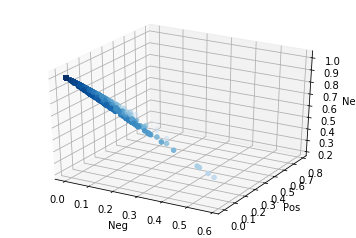

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')


ax.set_xlabel('Neg')
ax.set_ylabel('Pos')
ax.set_zlabel('Neu')
ax.scatter3D(df.neg.values, df.pos.values, df.neu.values, c=df.neu.values, cmap='Blues');

## Resultados

Depende del hashtag veremos mas resultados mas positivos, negativos o neutros.

## Conclusion

Estudiando y monitorizando el sentiment analisys, podemos entender y mejorar nuestro posicionamiento en las redes sociales.
